In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#helping functions

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

In [3]:
#reading data files and setting up font size

path_file = "./../output/mnist/z_ass/"
wpoint_files = "wTSNE_LR10_G10_partition_noniid_C1_nclient10.npy"
wpoint_files = "wPCA_MLP2_G10_partition_noniid_C1_nclient10.npy"

distance_euclidean_files = "d_euclidean_LR10_G10_partition_noniid_C1_nclient10.npy"

steps = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
distance_minkowski_files, dfs_distance_minkowski = {}, {}
for i in steps:
    distance_minkowski_files[i] = "d_minkowski_p1.0_MLP2_G2000_" + "round" + str(i) + "_partition_noniid90_nclient10.npy"
    dfs_distance_minkowski[i] = pd.read_csv(path_file + distance_minkowski_files[i], header = None)



dfp = pd.read_csv(path_file + wpoint_files)
dfdistance_euclidean = pd.read_csv(path_file + distance_euclidean_files, header = None)

fontsize = 20


In [4]:
#load mnist data and PCA

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

tsne = TSNE(n_components = 2, init = "random", learning_rate = "auto", random_state = 42)
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:5000], mnist.target[:5000]

In [5]:

X_train2D = tsne.fit_transform(X_train)


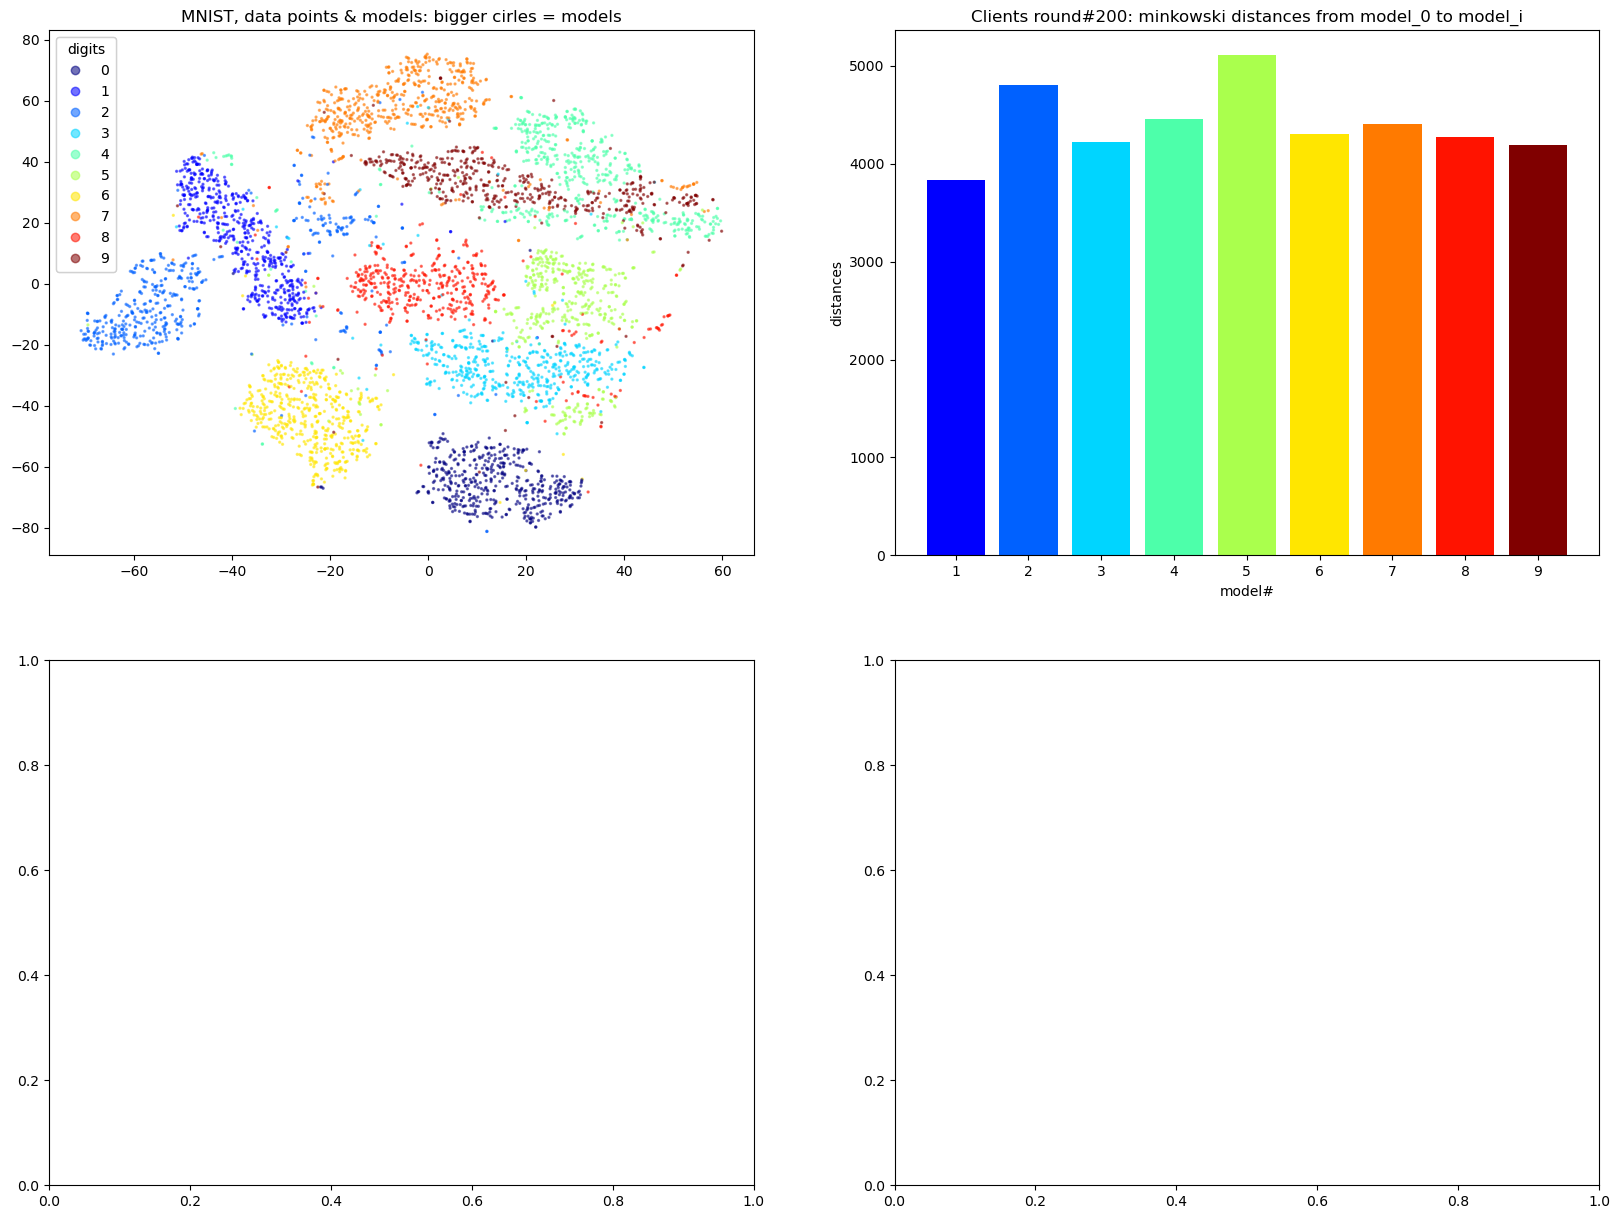

In [6]:
fig, axs = plt.subplots(2,2, figsize=(20,15))

axs[0,0].set_title("MNIST, data points & models: bigger cirles = models")


scatters = axs[0,0].scatter(X_train2D[:, 0], X_train2D[:, 1], s= 2, c = y_train.astype(np.int8), cmap = "jet", alpha = 0.5)

#axs[0,0].scatter(dfp['pc1'], dfp['pc2'], s= 100, c = range(10), cmap = "jet", alpha = 0.5)

legend1 = axs[0,0].legend(*scatters.legend_elements(),loc="upper left", title="digits")
axs[0,0].add_artist(legend1)


colors = [scatters.to_rgba(i) for i in range(1,10)]

axs[0,1].set_title("Clients round#200: minkowski distances from model_0 to model_i")
axs[0,1].bar(range(1, 10), dfs_distance_minkowski[200].values[0,1:], color = colors)
axs[0,1].set_xticks(range(1,10), range(1,10))
axs[0,1].set_ylabel("distances")
axs[0,1].set_xlabel("model#")


#axs[1,0].set_title("Clients round#600: minkowski distances from model_0 to model_i")
#axs[1,0].bar(range(1, 10), dfs_distance_minkowski[600].values[3,:], color = colors)
#axs[1,0].set_xticks(range(1,10), range(1,10))
#axs[1,0].set_ylabel("distances")
#axs[1,0].set_xlabel("model#")

#axs[1,1].set_title("Clients round#2000: minkowski distances from model_0 to model_i")
#axs[1,1].bar(range(1, 10), dfs_distance_minkowski[2000].values[3,1:], color = colors)
#axs[1,1].set_xticks(range(1,10), range(1,10))
#axs[1,1].set_ylabel("distances")
#axs[1,1].set_xlabel("model#")

        
plt.show()

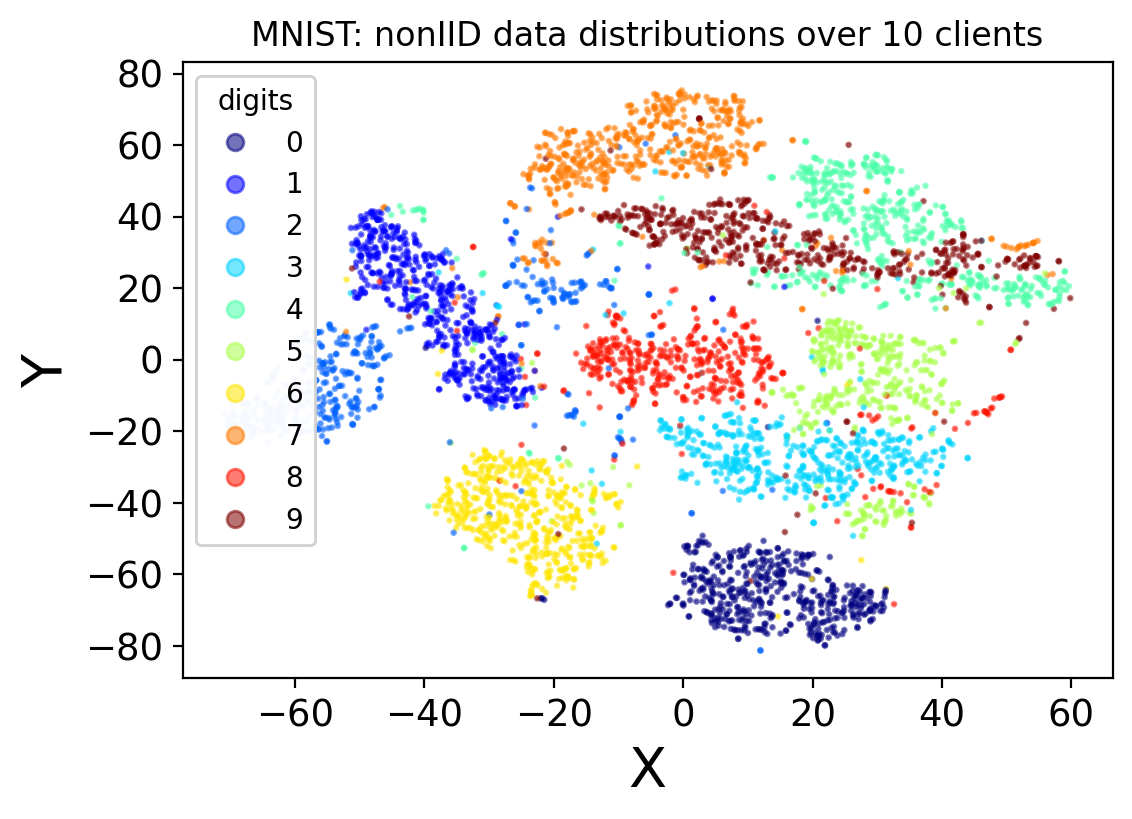

In [7]:

fig, ax = plt.subplots(figsize=(6,4))
ax.figure.set_dpi(200)

scatters = ax.scatter(X_train2D[:, 0], X_train2D[:, 1], s= 2, c = y_train.astype(np.int8), cmap = "jet", alpha = 0.5)

ax.set_title("MNIST: nonIID data distributions over 10 clients")

legend1 = ax.legend(*scatters.legend_elements(),loc="upper left", title="digits")
ax.add_artist(legend1)

ax.set_ylabel("Y", size=fontsize)
ax.set_xlabel("X", size=fontsize)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()




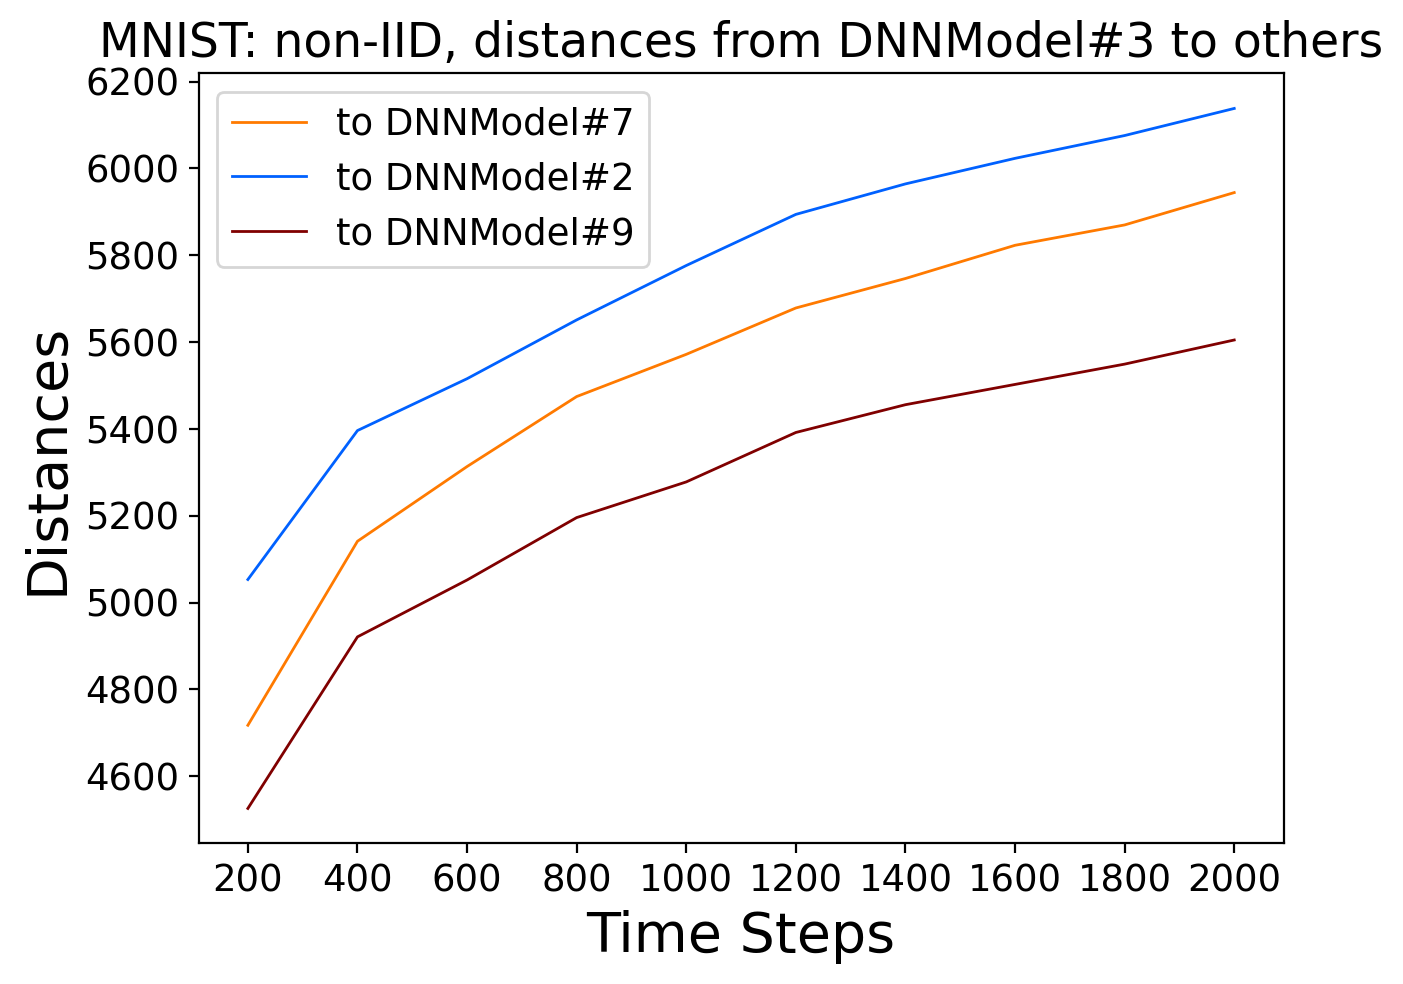

In [8]:
base_digit = 4 
digit1, digit2, digit5 = 7, 2, 9
dd1, dd2, dd5 = {}, {}, {}

for k in steps:
    dd1[k] = dfs_distance_minkowski[k].values[base_digit][digit1]
    dd2[k] = dfs_distance_minkowski[k].values[base_digit][digit2]
    dd5[k] = dfs_distance_minkowski[k].values[base_digit][digit5]
    

fig, ax = plt.subplots(figsize=(7,5))
ax.figure.set_dpi(200)


ax.plot(steps, list(dd1.values()), label = "to DNNModel#" + str(digit1),c = colors[digit1-1], linewidth = 1)
ax.plot(steps, list(dd2.values()), label = "to DNNModel#" + str(digit2),c = colors[digit2-1], linewidth = 1)
ax.plot(steps, list(dd5.values()), label = "to DNNModel#" + str(digit5),c = colors[digit5-1], linewidth = 1)



ax.set_title("MNIST: non-IID, distances from DNNModel#3 to others", size = fontsize - 3)
ax.set_ylabel("Distances", size=fontsize)
ax.set_xlabel("Time Steps", size=fontsize)
ax.legend(loc='best', fontsize=fontsize/1.5)
plt.xticks(steps, fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()
    


In [9]:
fontsize = 20

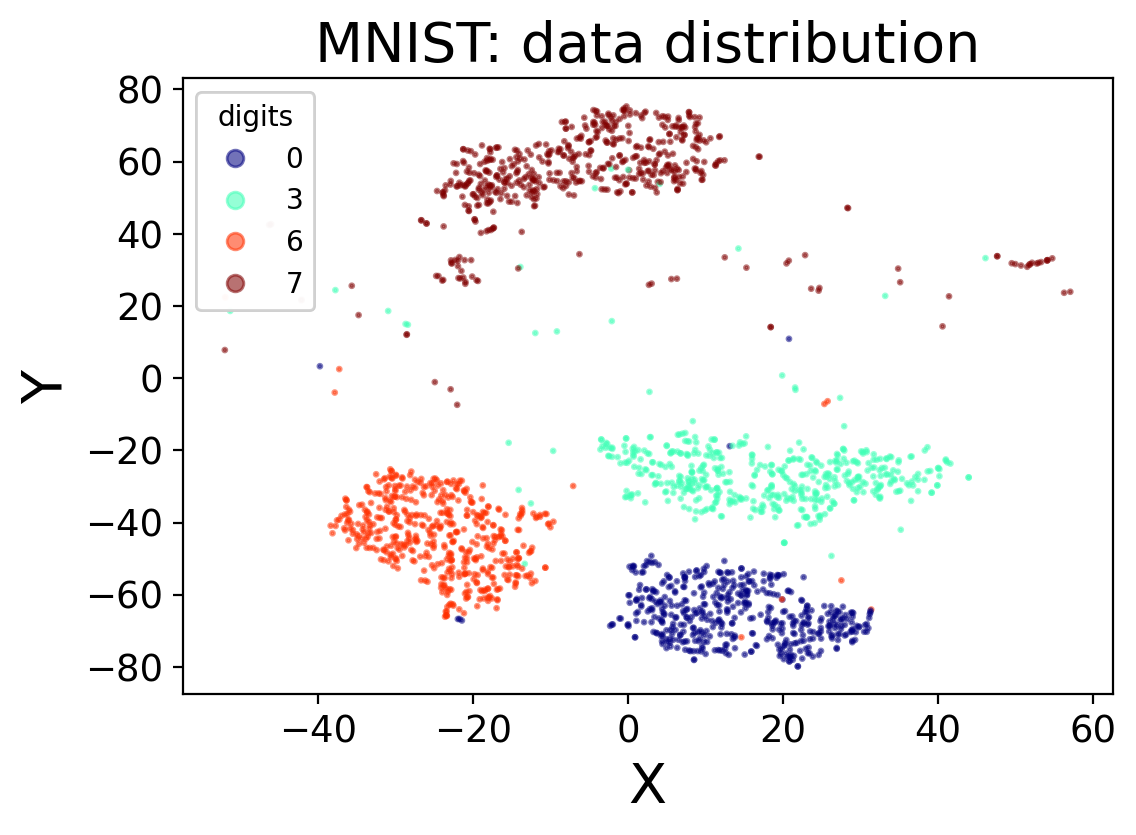

In [10]:
#now let's plot some following digits 
digits = [0, 3, 6, 7]
indices_plot = []

for i in range(len(X_train2D)):
    if int(y_train[i]) in digits:
        indices_plot.append(i)

X_train2D_plot = np.asarray(X_train2D)[indices_plot]
y_train_plot = np.asarray(y_train)[indices_plot]


fig, ax = plt.subplots(figsize=(6,4))
ax.figure.set_dpi(200)

scatters = ax.scatter(X_train2D_plot[:, 0], X_train2D_plot[:, 1], s= 2, c = y_train_plot.astype(np.int8), cmap = "jet", alpha = 0.5)

ax.set_title("MNIST: data distribution", size = fontsize)

legend1 = ax.legend(*scatters.legend_elements(),loc="upper left", title="digits")
ax.add_artist(legend1)

ax.set_ylabel("Y", size=fontsize)
ax.set_xlabel("X", size=fontsize)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()


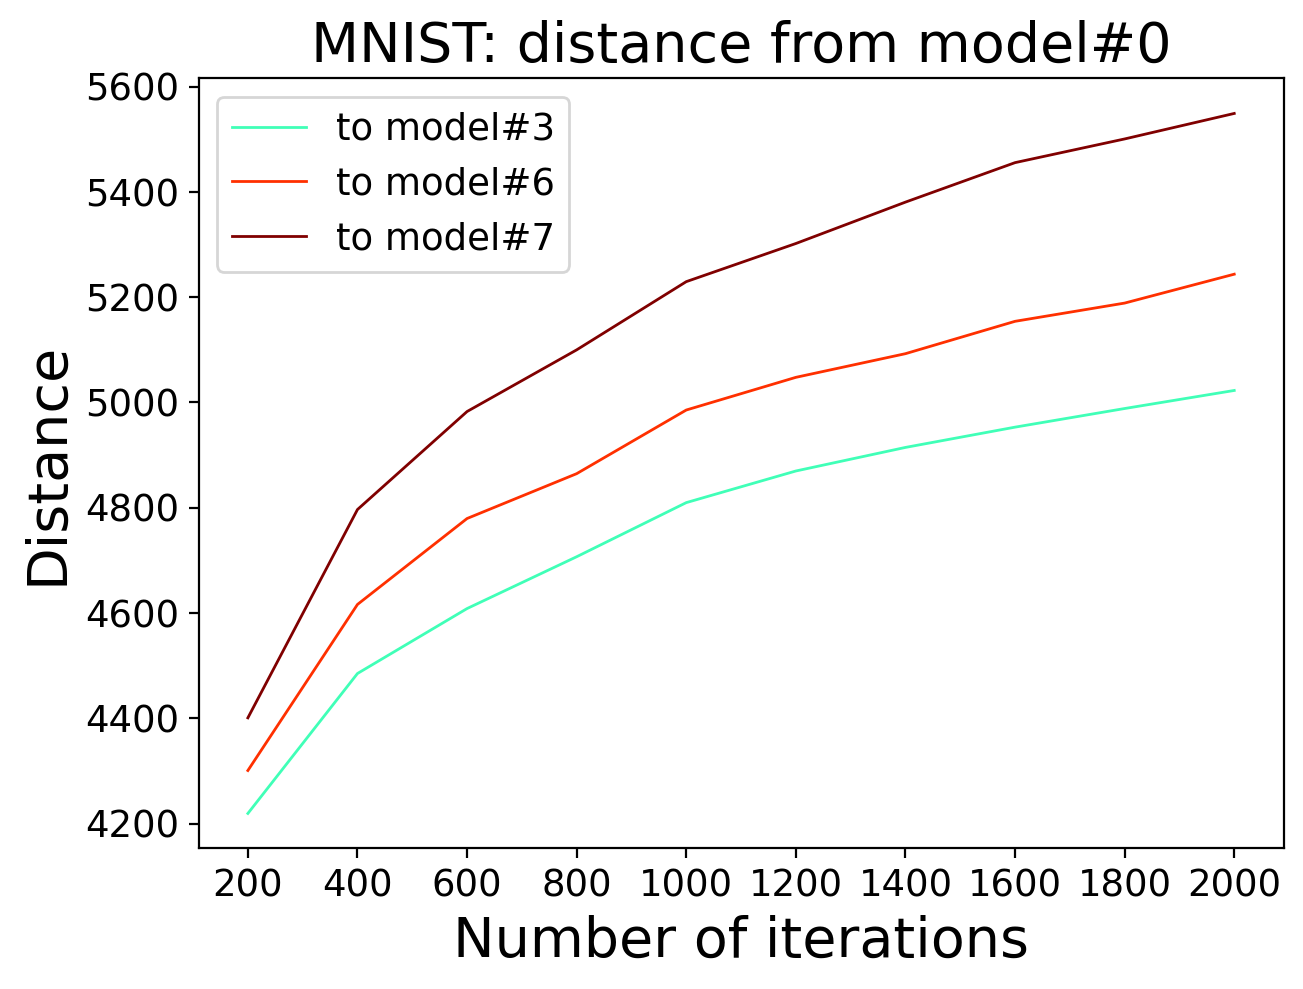

In [11]:
#plot distances
#we will plot the distances from model 0 -> model 6 (0 and 6 look similar), say dsim 
#---------and the distances from model 0 -> model 7 (0 and 7 look very different), say ddiv
#we expect that ddiv goes father away than dsim

#print(scatters.to_rgba(7))

colors = {digits[i]: scatters.to_rgba(digits[i]) for i in range(len(digits))}


sim_digit, div_digit, mid_digit = 3, 7, 6
dsim, ddiv, dmid = {}, {}, {}

for k in steps:
    dsim[k] = dfs_distance_minkowski[k].values[0][sim_digit]
    ddiv[k] = dfs_distance_minkowski[k].values[0][div_digit]
    dmid[k] = dfs_distance_minkowski[k].values[0][mid_digit]
    

fig, ax = plt.subplots(figsize=(7,5))
ax.figure.set_dpi(200)


ax.plot(steps, list(dsim.values()), label = "to model#" + str(sim_digit),c = colors[sim_digit], linewidth = 1)
ax.plot(steps, list(dmid.values()), label = "to model#" + str(mid_digit),c = colors[mid_digit], linewidth = 1)
ax.plot(steps, list(ddiv.values()), label = "to model#" + str(div_digit),c = colors[div_digit], linewidth = 1)



ax.set_title("MNIST: distance from model#0", size = fontsize)
ax.set_ylabel("Distance", size=fontsize)
ax.set_xlabel("Number of iterations", size=fontsize)
ax.legend(loc='best', fontsize=fontsize/1.5)
plt.xticks(steps, fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()
